# Introduction
- There are two types of recommendation system
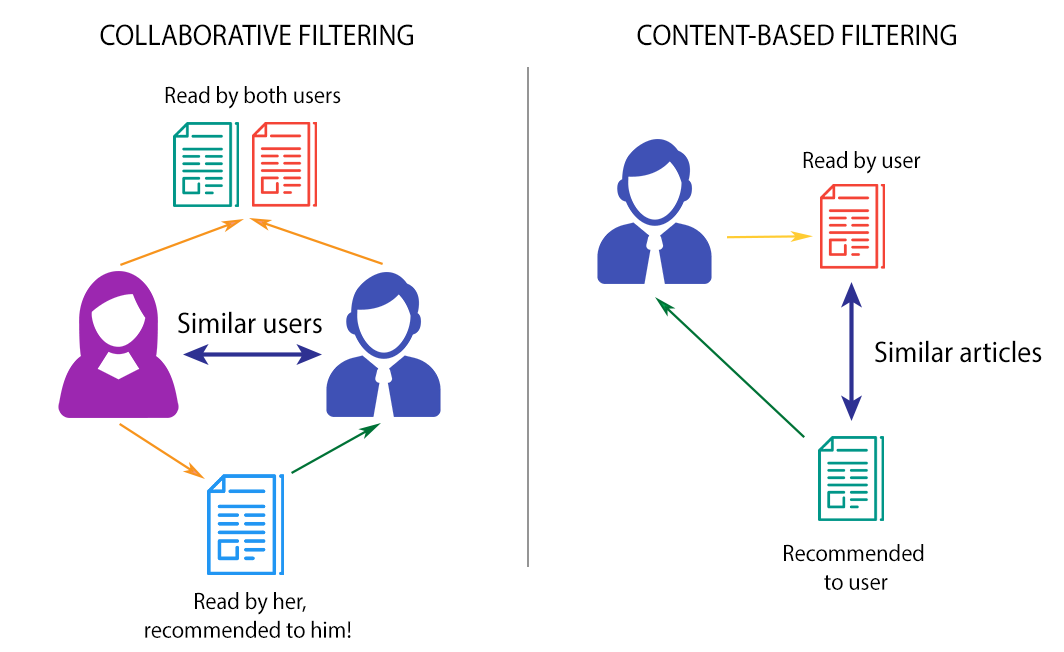

- **Content based approach** utilizes a series of discrete characteristics of an item in order to recommend additional items with similar properties.

- **Collaborative filtering approach** builds a model from a user’s past behaviors (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in.

# Importing Data and libraries

In [2]:
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Recommendation System - Correlation based

In [2]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})

rating_df = pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [3]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
df = pd.merge(rating_df, movies_df, on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


## Exploratory Data Analysis
- Let's explore the data a bit and get a look at some of the best rated movies.

- Let's create a ratings dataframe with average rating and number of ratings:

### Null Values checking

In [22]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

#### Checking Total number of ratings

In [124]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float32

In [125]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

## Data Visualization

In [126]:
# Mean Rating
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

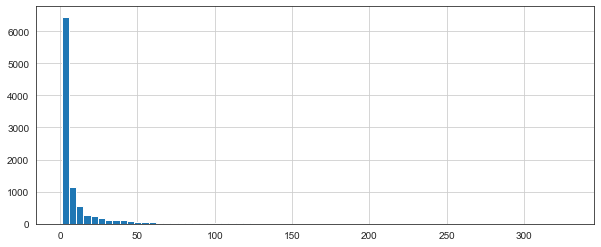

In [128]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

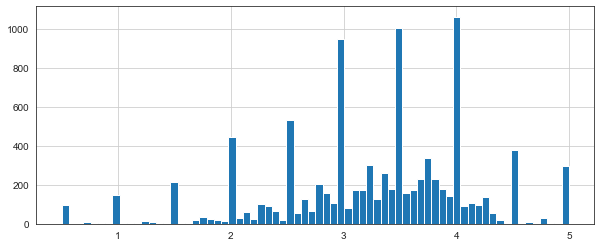

In [129]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

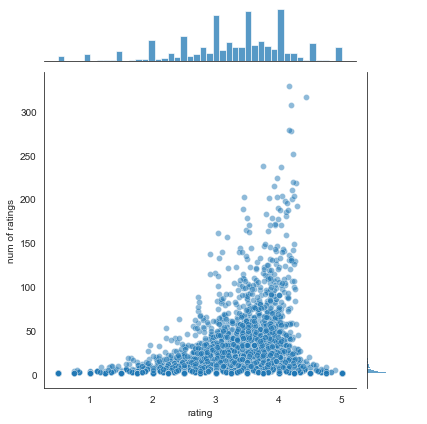

In [130]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

- Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending similar Movies

### Pivot Table

- Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [131]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Seeing Top rating movies

In [133]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


### Recommended Movies - who watched Forrest Gump

In [134]:
forrest_gump_user_ratings = moviemat['Forrest Gump (1994)']

forrest_gump_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float32

- We can then use corrwith() method to get correlations between two pandas series:

In [135]:
similar_to_forrest_gump = moviemat.corrwith(forrest_gump_user_ratings)

C:\Users\Anuj\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Anuj\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [136]:
corr_forrest_gump = pd.DataFrame(similar_to_forrest_gump,columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


#### Handling Low number of ratings movies

- Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched forrest gump (it was the most popular movie).
- Basically, there are many movies with one ratings only, which is useless

In [137]:
corr_forrest_gump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


- Let's fix this by filtering out movies that have less than 50 reviews (this value was chosen based off the histogram from earlier).

In [138]:
corr_forrest_gump = corr_forrest_gump.join(ratings['num of ratings'])
corr_forrest_gump.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [139]:
corr_forrest_gump[corr_forrest_gump['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


- **Recommended Movies who watched Forrest Gump:**
    - Good Will Hunting (1997)	
    - Aladdin (1992)
    - American History X (1998)	
    - Truman Show, The (1998)

### Recomended Movies - who watched Jurassic Park (1993)

In [140]:
jurassic_park_user_ratings = moviemat['Jurassic Park (1993)']

In [141]:
similar_to_jurassic_park = moviemat.corrwith(jurassic_park_user_ratings)

C:\Users\Anuj\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Anuj\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [142]:
corr_jurassic_park = pd.DataFrame(similar_to_jurassic_park,columns=['Correlation'])

corr_jurassic_park.dropna(inplace=True)

corr_jurassic_park.head()

,Correlation
title,
"'burbs, The (1989)",0.104077
(500) Days of Summer (2009),-0.125237
*batteries not included (1987),0.290929
...And Justice for All (1979),-0.981981
10 Cent Pistol (2015),-1.000000


#### Handling Low number of ratings movies

- We have to remove all movies with less number of ratings

In [143]:
corr_jurassic_park = corr_jurassic_park.join(ratings['num of ratings'])
corr_jurassic_park.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.104077,17
(500) Days of Summer (2009),-0.125237,42
*batteries not included (1987),0.290929,7
...And Justice for All (1979),-0.981981,3
10 Cent Pistol (2015),-1.000000,2


In [144]:
corr_jurassic_park[corr_jurassic_park['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108


- **Recommended Movies who watched Jurassic Park (1993):**
    - Outbreak (1995)	
    - Ghostbusters (a.k.a. Ghost Busters) (1984)
    - Fugitive, The (1993)
    - Indiana Jones and the Temple of Doom (1984)

# Recommendation System - kNN - Collaborative Based

In [145]:
movies_df = pd.read_csv('movies.csv', usecols=['movieId','title'], dtype={'movieId': 'int32', 'title': 'str'})

rating_df = pd.read_csv('ratings.csv', usecols=['userId', 'movieId', 'rating'], dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [146]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [147]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [148]:
df = pd.merge(rating_df, movies_df, on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [151]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

In [152]:
movie_ratingCount = (df.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'}))

movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [153]:
rating_with_totalRatingCount = df.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [154]:
print(movie_ratingCount['totalRatingCount'].describe())

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: totalRatingCount, dtype: float64


In [158]:
df.shape

(100836, 4)

In [157]:
rating_with_totalRatingCount.shape

(100836, 5)

## Removing Less number of rating movies
- There are many movies with one ratings only. We will remove less than 50 number of rating (this value was chosen based off the histogram from earlier).

In [159]:
popularity_threshold = 50
rating_popular_movie = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [160]:
rating_popular_movie.shape

(41362, 5)

## Pivot Table

In [167]:
movie_pivot_df = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_pivot_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


- Matrices that mostly contain zeroes are said to be sparse.
- For more efficient calculation and less memory footprint, we need to transform the values of the dataframe into a scipy sparse matrix
- https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

- This kNN is unsupervised learning

In [168]:
from scipy.sparse import csr_matrix

movie_pivot_df_matrix = csr_matrix(movie_pivot_df.values)

In [169]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_pivot_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [170]:
movie_pivot_df.shape

(450, 606)

In [171]:
# Choosing random movie for recommending next movie
query_index = np.random.choice(movie_pivot_df.shape[0])
print(query_index)

# Recommending next six movies using knn
distances, indices = model_knn.kneighbors(movie_pivot_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

23


In [178]:
movie_pivot_df.index[23]

'American Psycho (2000)'

In [189]:
display(distances)
display(distances.shape)

print(indices)

array([[0.        , 0.475205  , 0.47896266, 0.5018642 , 0.5088152 ,
        0.50888956]], dtype=float32)

(1, 6)

[[ 23 339  24 232 449  55]]


In [190]:
display(distances.flatten())
display(distances.flatten().shape)

print(indices.flatten())

array([0.        , 0.475205  , 0.47896266, 0.5018642 , 0.5088152 ,
       0.50888956], dtype=float32)

(6,)

[ 23 339  24 232 449  55]


In [191]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_pivot_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_pivot_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for American Psycho (2000):

1: Scarface (1983), with distance of 0.4752050042152405:
2: Anchorman: The Legend of Ron Burgundy (2004), with distance of 0.47896265983581543:
3: Kill Bill: Vol. 2 (2004), with distance of 0.5018641948699951:
4: Zoolander (2001), with distance of 0.5088152289390564:
5: Big Lebowski, The (1998), with distance of 0.5088895559310913:


- Indices are basically Index of movie in 'movie_pivot_df'